# Activity 8.02
Import the required Libraries

In [1]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


Initiate the Model

In [2]:
classifier = ResNet50()
classifier.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

Load the Image

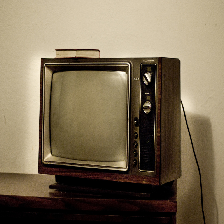

In [3]:
new_image= image.load_img('../Data/Prediction/test_image_4.jpg', target_size=(224, 224))
new_image

Change the image to array

In [4]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

Expand the tranfromed image with 4th Dimension

In [5]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

Preprocess the Image

In [6]:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[  33.060997  ,   51.221     ,   59.32      ],
         [  29.060997  ,   50.221     ,   59.32      ],
         [  25.060997  ,   47.221     ,   54.32      ],
         ...,
         [  30.060997  ,   50.221     ,   58.32      ],
         [  37.060997  ,   55.221     ,   63.32      ],
         [  33.060997  ,   51.221     ,   59.32      ]],

        [[  28.060997  ,   46.221     ,   54.32      ],
         [  30.060997  ,   52.221     ,   59.32      ],
         [  27.060997  ,   47.221     ,   55.32      ],
         ...,
         [  26.060997  ,   48.221     ,   55.32      ],
         [  30.060997  ,   52.221     ,   59.32      ],
         [  32.060997  ,   52.221     ,   60.32      ]],

        [[  28.060997  ,   48.221     ,   56.32      ],
         [  29.060997  ,   49.221     ,   57.32      ],
         [  31.060997  ,   51.221     ,   59.32      ],
         ...,
         [  28.060997  ,   48.221     ,   56.32      ],
         [  21.060997  ,   39.221     ,   47.32      ],
  

Create a predictor variable

In [7]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[3.36011115e-11, 6.69067191e-10, 1.04476122e-10, 1.33510564e-10,
        6.83042928e-11, 1.76949271e-11, 1.61705635e-10, 3.06478481e-10,
        1.08718395e-10, 1.63380059e-10, 2.64175265e-10, 1.29403444e-09,
        3.11418863e-10, 3.34071770e-10, 1.42325318e-09, 3.99426270e-09,
        1.06622516e-10, 3.36060624e-10, 4.95143748e-09, 8.81697659e-10,
        1.32437283e-09, 9.36283898e-11, 1.22221858e-10, 3.53599129e-11,
        7.33262270e-11, 8.20125357e-11, 2.21354341e-11, 3.82694432e-11,
        8.72288144e-11, 1.00195255e-10, 1.11788312e-09, 8.09049605e-10,
        2.62842359e-10, 3.30430926e-11, 5.44623305e-11, 1.31489750e-11,
        1.11012068e-10, 1.36435296e-09, 1.68157745e-11, 1.53226307e-10,
        1.30861072e-10, 7.15998996e-11, 4.23643690e-11, 1.35881095e-09,
        3.72460174e-10, 5.71450165e-10, 5.83191384e-10, 4.46524241e-11,
        9.60414248e-11, 8.37852773e-11, 8.95674160e-11, 1.00707005e-10,
        2.20020127e-10, 1.14473729e-10, 9.10489462e-10, 2.352906

Check the shape of the array

In [8]:
y_pred.shape

(1, 1000)

Make the predictions

In [9]:
from keras.applications.resnet50 import decode_predictions
decode_predictions(y_pred, top=5)

[[('n04404412', 'television', 0.99673873),
  ('n04372370', 'switch', 0.0009829825),
  ('n04152593', 'screen', 0.00095111143),
  ('n03782006', 'monitor', 0.0006477369),
  ('n04069434', 'reflex_camera', 8.5398955e-05)]]

Make the predictions in readable form

In [10]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

television (99.67%)
